# RITZ-JAGER HOTEL ANALYSIS

You’ve landed a great job with the Ritz-Jager Hotel operator as a data scientist. This hotel operator wants to improve their business efficiency by utilizing their historical data and they want to find out what happened in their previous bookings, knowing their customer better, and optimizing the promo timing.

Your team of engineer have to analyze the data that they have based on the pre-defined questions that your CEO gave.

Questions:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations?

Before answering the questions, we will **import pandas**, **read the csv file**, and **try to find general information** about data that we will use for analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.colors
matplotlib.colors.rgb_to_hsv
matplotlib.colors.to_rgba
matplotlib.figure.Figure.get_size_inches
matplotlib.figure.Figure.subplots_adjust
matplotlib.axes.Axes.text
matplotlib.axes.Axes.hlines
import seaborn as sns
import datetime

In [3]:
# convert csv file to dataframe
df = pd.read_csv('/Users/raveltowangistu/Desktop/Iykra/Week3/Data Analysis/Ritz_Jager_Data.csv')

To understand more about data, we will use:
    <br> 1. df.shape( ) --> To know **total rows and columns** in datasets </br>
    <br> 2. df.info( ) --> To know the **data types** that will be use in here. </br>
    <br> 3. df.head( ) --> To know the **first five data** of the table </br>
    <br> 4. df.describe( ) --> To describe the **5 summary** of intergral data </br>
    <br> 5. df.isnull.sum( ) --> To know **total null** in each columns of data </br>

In [4]:
# To know total rows and columns in data
df.shape

(119390, 32)

In [5]:
#finding datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel_type                        119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal_type                         119390 non-null object
country_origin                    118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [6]:
#to know the first 5 data that we will use.
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [7]:
#To describe 5 summary of data that provided
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#To know total null in each columns of data
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country_origin                       488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal_type                              0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

## Where do the guests come from?

Since the column of **country-origin** have **48 null data**, we need to know is it proper **to erase the data or to fill the data with mode**.
<br> In order to know, we will divide **total null data of country_origin** with **total rows in country_origin column**</br>

In [9]:
100*df['country_origin'].isnull().sum() / df['country_origin'].count() 

0.41042202822492474

Since null data in country_origin only accounts for 0.41% data from total sets. We will erase the row with null data.

In [10]:
country_from = df.dropna(subset = ['country_origin'],axis = 0, how= 'any')
country_from.isnull().sum().sort_values(ascending = False)

company                           112279
agent                              16006
children                               4
arrival_date_day_of_month              0
meal_type                              0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
reservation_status_date                0
market_segment                         0
arrival_date_week_number               0
arrival_date_month                     0
arrival_date_year                      0
lead_time                              0
is_canceled                            0
country_origin                         0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

Since we want to know, where do the guests come from. We want to make sure that the guests are **REALLY COME** to Ritz-Jagger Hotel. In order to do that, we need to make sure that guests are **NOT CANCEL THEIR BOOKINGS**.

In [11]:
country_stay = country_from[['country_origin','is_canceled']]
fix_country = country_stay[country_stay['is_canceled'] == 0]
fix_country.head()

,country_origin,is_canceled
0,PRT,0
1,PRT,0
2,GBR,0
3,GBR,0
4,GBR,0


To know data with most guests come from, we can use **value_counts** and **sort_values(ascending = False)**. 

In [12]:
fix_country['country_origin'].value_counts().sort_values(ascending = False).reset_index()

,index,country_origin
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,SLE,1
162,DMA,1
163,BFA,1


Based on data above, we know there are **total 177 countries** that went to Ritz-Jaget Hotel. To make it easy, let's use **bar graph for the 5 top countries**. 

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


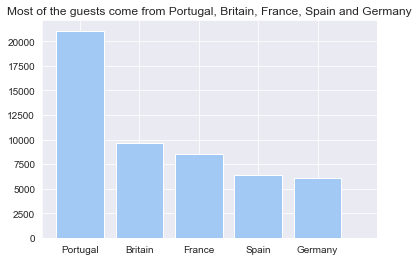

In [13]:
#create new column that consists of country_origin total value per country
fix_country = fix_country['country_origin'].value_counts().rename_axis('country_code').reset_index()
fix_country.head()

#Create bar that show the highest 5 country
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.bar(fix_country['country_code'][0:5],fix_country['country_origin'][0:5])
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
#Change name that more apropiate to users
ax.set_xticklabels(['Portugal','Britain','France','Spain','Germany'])
plt.title('Most of the guests come from Portugal, Britain, France, Spain and Germany')
plt.show()


**INTERPRETATION**:
<br> Based on the data, the top 5 countries who visit Ritz-Jager Hotel are **Portugal** (21071) ,**Britain** (9767) , **France** (8481) , **Spain** (6391) , and **Germany** (6069). </br>

## How much do guests pay for a room per night?

To know the price, we can calculate **mean** of the price based on all guests. **Is_canceled need to be 0**, because guests only pay room when they actually sleep on there.

On the other side, we will calculate average price of per room because number of guests have low correlation with total rooms (for example, having one guests and one family, they still need to rent one rooms).

In [25]:
#create df from adr and is_canceled
price = df[['adr','is_canceled']]
#create df only when is_canceled is not happen
price = price[price['is_canceled']==0]
#find the mean
mean_price = price['adr'].mean()
std_price = price['adr'].std()
print('Guest need to pay for a room per night are around ' + str(mean_price) + ' +/- ' + str(std_price))

Guest need to pay for a room per night are around 99.9876929728839 +/- 49.20626332561226


**INTERPRETATION**:
<br> Based on the data, guests need to pay are around $ 99.987 (avg) and $ 49.206 (std) dollar. </br>

## How does the price per night vary over the year?

To know variation price per night, we will use comparison between **Year Arrival** and **Average Daily Rate**.

Since the average daily rate (ADR) measures the average rental revenue earned for **an occupied room per day** , we need only use data where guests are **not cancel their bookings or 'is_canceled' == 0**.

In [26]:
#Create new dataframe that consists only arrival year, status of booking, and average daily rate.
year_price = df[['arrival_date_year','arrival_date_month','is_canceled','adr']]

#Only use data that the booking aren't been canceled. so is_canceled == 0
year_price = year_price[year_price['is_canceled'] == 0]

#Use groupby based on year, to know adr in every year
year_price_groupby = year_price.groupby('arrival_date_year')['adr'].mean().reset_index()
year_price_groupby.head()

,arrival_date_year,adr
0,2015,88.714191
1,2016,96.515912
2,2017,111.312036


After knowing the number, let's make **the graph**

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


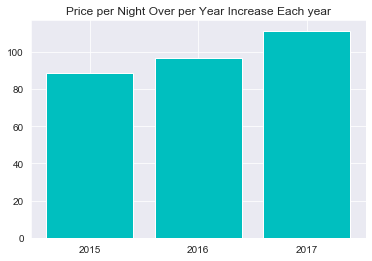

In [27]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.bar(year_price_groupby['arrival_date_year'],year_price_groupby['adr'],color='c',tick_label = df['arrival_date_year'].unique().tolist())
ax = plt.subplot()
plt.title('Price per Night Over per Year Increase Each year')
plt.show()

On the other side, we can also know the price of hotel in every months.

In [28]:
month_price_groupby = year_price.groupby('arrival_date_month')['adr'].mean().sort_values(ascending = False).reset_index()
month_price_groupby

,arrival_date_month,adr
0,August,142.088795
1,July,129.253758
2,June,114.589636
3,September,107.277159
4,May,104.842342
5,April,97.877849
6,October,86.830198
7,December,78.920238
8,March,77.331574
9,February,72.419429


/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


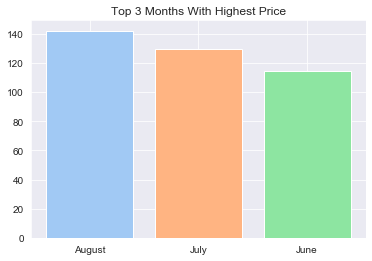

In [29]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.bar(month_price_groupby['arrival_date_month'][0],month_price_groupby['adr'][0])
plt.bar(month_price_groupby['arrival_date_month'][1],month_price_groupby['adr'][1])
plt.bar(month_price_groupby['arrival_date_month'][2],month_price_groupby['adr'][2])
ax = plt.subplot()
plt.title('Top 3 Months With Highest Price')
plt.show()

**INTERPRETATION :**
<br> Price **tend to inflated** throughout years from 2015 to 2017. The highest happen price happen on **August** month </br>

## Which are the busiest months?

To know the busiest months, we can use **month arrival and count the total**.

In [30]:
busiest_month = df['arrival_date_month']
busiest_month = busiest_month.value_counts().sort_values(ascending = True).reset_index()
busiest_month

,index,arrival_date_month
0,January,5929
1,December,6780
2,November,6794
3,February,8068
4,March,9794
5,September,10508
6,June,10939
7,April,11089
8,October,11160
9,May,11791


To make sure and better visualization, lets make the graph!

/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


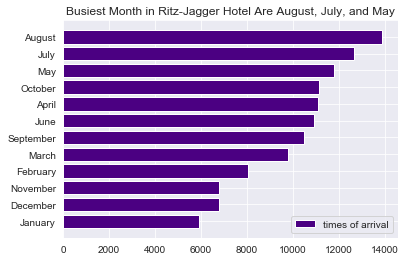

In [31]:
plt.barh(busiest_month['index'],busiest_month['arrival_date_month'],color='indigo')
ax = plt.subplot()
plt.title('Busiest Month in Ritz-Jagger Hotel Are August, July, and May')
plt.legend(['times of arrival'])
plt.show()

**INTERPRETATION :**
<br> Busiest month in Ritz-Jagger are **August** (13387), **July** (12661), and **May** (11791)</br>

## How long do people stay at the hotels?

To know how long do people stay, we will summary use **mean, std, and median**. 

In [32]:
#save variable ('stay_weekday') and ('stay_weekend') into total_stay
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
#create new variable consists of column stay weekday, weekend, and total
stay = df[['stays_in_week_nights','stays_in_weekend_nights','total_stay']]

In [33]:
#describe the variabel
stay.describe()

,stays_in_week_nights,stays_in_weekend_nights,total_stay
count,119390.000000,119390.000000,119390.000000
mean,2.500302,0.927599,3.427900
std,1.908286,0.998613,2.557439
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000
50%,2.000000,1.000000,3.000000
75%,3.000000,2.000000,4.000000
max,50.000000,19.000000,69.000000


After knowing mean, median, and std, we will use **histogram** to know the distribution of how people stay.

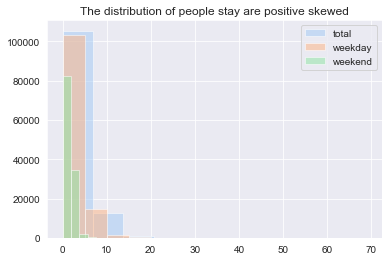

In [34]:
plt.hist(df['total_stay'], alpha = 0.5)
plt.hist(df['stays_in_week_nights'], alpha = 0.5)
plt.hist(df['stays_in_weekend_nights'], alpha = 0.5)
plt.legend(['total','weekday','weekend'])
plt.title('The distribution of people stay are positive skewed')
plt.show()

**INTERPRETATION**:
<br> Based on **total_stay (M = 3.428, SD = 2.557)**, we can know that people tend to stay in **weekday (M = 2.5, SD = 1.908)** and **weekend (M = 0.928, SD = 0.998)**. The distribution of data is **positively skewed**. </br>

## Bookings by market segment

Since booking can be calculated by **total booking not cancellation + total booking cancellation**, we will use **is_canceled** row to know booking based by market segment.

In [35]:
booking_segment = df[['market_segment','is_canceled']]
booking_segment = booking_segment.groupby('market_segment').is_canceled.count().sort_values(ascending = False).reset_index()
booking_segment

,market_segment,is_canceled
0,Online TA,56477
1,Offline TA/TO,24219
2,Groups,19811
3,Direct,12606
4,Corporate,5295
5,Complementary,743
6,Aviation,237
7,Undefined,2


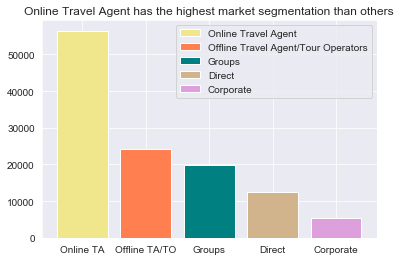

In [36]:
plt.bar(booking_segment['market_segment'][0],booking_segment['is_canceled'][0], color ='khaki')
plt.bar(booking_segment['market_segment'][1],booking_segment['is_canceled'][1], color ='coral')
plt.bar(booking_segment['market_segment'][2],booking_segment['is_canceled'][2], color ='teal')
plt.bar(booking_segment['market_segment'][3],booking_segment['is_canceled'][3], color ='tan')
plt.bar(booking_segment['market_segment'][4],booking_segment['is_canceled'][4], color ='plum')
plt.title('Online Travel Agent has the highest market segmentation than others')
plt.legend(['Online Travel Agent','Offline Travel Agent/Tour Operators','Groups','Direct','Corporate'])
plt.show()

**INTERPRETATION :**
<br> Based on the result,we can know that **Online Travel Agent** (56477), **Offline Travel Agent/Tour Operators** (24219), and **Groups** (19811) are the top 3 highest booking market segment.

## How many bookings were cancelled?

We will create a new dataframe that consists of **year, hotel type, and cancellation condition.**

In [37]:
# Create new df consists of arrival year, hotel_type, and is_canceled
booking = df[['arrival_date_year','hotel_type','is_canceled']]

#create new df where only canceled booking 
canceled_year = booking[booking['is_canceled']==1]
#calculate the total rows
total_cancel = canceled_year.is_canceled.count()
print('There are ' + str(total_cancel) +' cancellation in 2015-2017 on Ritz-Jager Hotel.' )

#create new df where only accepted booking 
not_canceled_year = booking[booking['is_canceled']==0]
#calculate total rows
total_not_cancel = not_canceled_year.is_canceled.count()
print('There are ' + str(total_not_cancel) +' continued in 2015-2017 on Ritz-Jager Hotel.' )


There are 44224 cancellation in 2015-2017 on Ritz-Jager Hotel.
There are 75166 continued in 2015-2017 on Ritz-Jager Hotel.


/Users/raveltowangistu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


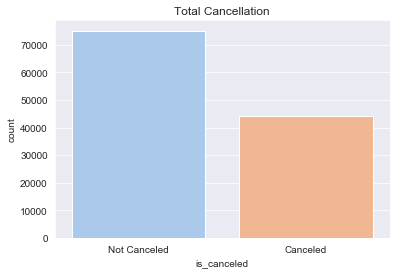

In [38]:
sns.countplot(x="is_canceled", data=df)
ax = plt.subplot()
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Canceled','Canceled'])
plt.title('Total Cancellation')
plt.show()

To gain more information, we will see cancellation based on **year and hotel type** in Ritz-Jager Hotel

In [39]:
canceled_year = canceled_year.groupby(['arrival_date_year','hotel_type']).is_canceled.count().reset_index()
canceled_year

,arrival_date_year,hotel_type,is_canceled
0,2015,City Hotel,6004
1,2015,Resort Hotel,2138
2,2016,City Hotel,15407
3,2016,Resort Hotel,4930
4,2017,City Hotel,11691
5,2017,Resort Hotel,4054


**INTERPRETATION**:
<br> Based on the result, we can know that there are **44224 booking cancellation** which **dominate by City Hotel** especially in year **2016 and 2017**. </br>

## Which month has the highest number of cancellations?

Research from Hotel Management, shows that cancellation rate are calculated based on date arrival not **booking day**. We will use **arrival_date_month** and **is_canceled** to know in what time, most cancellation_occur. 

In [40]:
#Create new dataframe that consists of arrival month, hotel, and canceled condition
cancellation_month = df[['arrival_date_month','hotel_type','is_canceled']]
#Create condition where all data in new df have cancel status
cancellation_month = cancellation_month[cancellation_month['is_canceled'] == 1]
#Groupby cancellation based on month and total rows
canceled = cancellation_month.groupby('arrival_date_month').is_canceled.count().sort_values(ascending = False).reset_index()
canceled


,arrival_date_month,is_canceled
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


Lets take a look at **the bar graph** to know more!

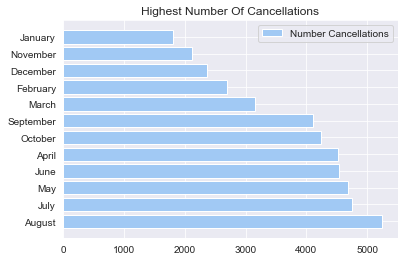

In [41]:
plt.barh(canceled['arrival_date_month'],canceled['is_canceled'])
plt.title('Highest Number Of Cancellations')
plt.legend(['Number Cancellations'])
plt.show()

In [42]:
cancel_hotel = cancellation_month.groupby(['arrival_date_month','hotel_type']).is_canceled.count().sort_values(ascending = False).reset_index()
cancel_hotel

,arrival_date_month,hotel_type,is_canceled
0,May,City Hotel,3653
1,August,City Hotel,3602
2,June,City Hotel,3528
3,April,City Hotel,3465
4,July,City Hotel,3306
5,October,City Hotel,3268
6,September,City Hotel,3110
7,March,City Hotel,2386
8,February,City Hotel,1901
9,December,City Hotel,1740


**INTERPRETATION**:
<br> Based on the data, we can know that cancellation are mostly happen on Summer season such as, **August (5239), July (4742), May(4677), June(4535)**. Also, most of cancellation happen in **City Hotel**. </br>

**Reference :**
<br> 1. https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy </br>
<br> 2. https://www.investopedia.com/terms/a/average-daily-rate.asp#:~:text=The%20average%20daily%20rate%20is%20calculated%20by%20taking%20the%20average,and%20rooms%20occupied%20by%20staff. </br>